In [130]:
%matplotlib inline

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [132]:
pd.reset_option("display.max_rows")

In [133]:
merged_data = pd.read_csv("data/merged_data_cleaned.csv")
merged_data = merged_data.rename(columns={"Unnamed: 0": "index"})
# merged_data = merged_data.reset_index()
merged_data['index'] = merged_data['index'] + 1
merged_data.index = range(1, len(merged_data) + 1)
merged_data

,index,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1336,1336,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1337,1337,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1338,1338,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [134]:
merged_data.shape

(1339, 44)

In [135]:
observations_sum =  merged_data.shape[0]
observations_sum


1339

In [136]:
features_sum = merged_data.shape[1]
features_sum

44

In [137]:
merged_data.columns

Index(['index', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [138]:
for idx, col in enumerate(merged_data.columns, start = 1):
    print(f"{idx}. {col}")

1. index
2. Species
3. Owner
4. Country.of.Origin
5. Farm.Name
6. Lot.Number
7. Mill
8. ICO.Number
9. Company
10. Altitude
11. Region
12. Producer
13. Number.of.Bags
14. Bag.Weight
15. In.Country.Partner
16. Harvest.Year
17. Grading.Date
18. Owner.1
19. Variety
20. Processing.Method
21. Aroma
22. Flavor
23. Aftertaste
24. Acidity
25. Body
26. Balance
27. Uniformity
28. Clean.Cup
29. Sweetness
30. Cupper.Points
31. Total.Cup.Points
32. Moisture
33. Category.One.Defects
34. Quakers
35. Color
36. Category.Two.Defects
37. Expiration
38. Certification.Body
39. Certification.Address
40. Certification.Contact
41. unit_of_measurement
42. altitude_low_meters
43. altitude_high_meters
44. altitude_mean_meters


In [139]:
merged_data.dtypes

index                      int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

In [140]:
numbers_columns = merged_data.select_dtypes(include=["int64", "float64"])
numbers_columns


,index,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,1,300,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,0,1950.0,2200.0,2075.0
2,2,300,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,1,1950.0,2200.0,2075.0
3,3,5,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,0,1600.0,1800.0,1700.0
4,4,320,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,2,1800.0,2200.0,2000.0
5,5,300,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,2,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,1,NaN,NaN,NaN
1336,1336,1,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,0,40.0,40.0,40.0
1337,1337,1,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,6,795.0,795.0,795.0
1338,1338,1,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,1,NaN,NaN,NaN


In [141]:
len(numbers_columns)

1339

In [142]:
categorical_columns = merged_data.select_dtypes(include=["object", "category"])
categorical_columns

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Grading.Date,Owner.1,Variety,Processing.Method,Color,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,"April 4th, 2015",metad plc,NaN,Washed / Wet,Green,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,"April 4th, 2015",metad plc,Other,Washed / Wet,Green,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,NaN,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,Green,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,"April 4th, 2015",metad plc,Other,Washed / Wet,Green,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",...,"January 19th, 2016",Luis Robles,NaN,NaN,Blue-Green,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m
1336,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",...,"January 19th, 2016",Luis Robles,NaN,NaN,Blue-Green,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m
1337,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,"kwanza norte province, angola",...,"December 23rd, 2014",James Moore,NaN,Natural / Dry,NaN,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m
1338,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,NaN,...,"August 25th, 2014",Cafe Politico,NaN,Natural / Dry,Green,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m


In [143]:
len(categorical_columns)

1339

### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [144]:
merged_data_copy = merged_data.copy()
merged_data_copy.columns = [re.sub(r'\W+', '_', col.lower()) for col in merged_data_copy.columns]
merged_data_copy

,index,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1336,1336,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1337,1337,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1338,1338,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

In [145]:
merged_data_copy["bag_weight"]


1       60 kg
2       60 kg
3           1
4       60 kg
5       60 kg
        ...  
1335     2 kg
1336     2 kg
1337     1 kg
1338    5 lbs
1339    5 lbs
Name: bag_weight, Length: 1339, dtype: object

##### We see that most of the values ​​in the **"bag weight"** column are in kg, so we take this unit for granted. To optimize the data in the column, we need to create a function that converts all values ​​that are not in kg to kg. In the function, we use the corresponding date and column. We do the necessary checks and record all values ​​that are converted to kg. We also create another function to change the name of the column **"bag_weight_kg"**, so that it is known that everything in it is in kg.

In [146]:
def convert_weight_to_kg(db, column):
    
    def convert(value):
        if pd.isnull(value) or str(value).strip() == '':
            return np.nan

        value_str = str(value).lower().strip()

        if 'lbs' in value_str:
            num = float(re.findall(r'\d+\.?\d*', value_str)[0])
            return round(num * 0.453592, 2)

        elif 'kg' in value_str:
            num = float(re.findall(r'\d+\.?\d*', value_str)[0])
            return num

        elif re.match(r'^\d+\.?\d*$', value_str):
            return float(value_str)

    db[column] = db[column].apply(convert)

    return db

In [147]:
merged_data_copy = convert_weight_to_kg(merged_data_copy,'bag_weight')

In [148]:
def rename_column(db, old_column_name, new_column_name):
    db = db.rename(columns={old_column_name: new_column_name})
    
    return db

In [149]:
merged_data_copy = rename_column(merged_data_copy, 'bag_weight', 'bag_weight_kg')

In [150]:
merged_data_copy["bag_weight_kg"]

1       60.00
2       60.00
3        1.00
4       60.00
5       60.00
        ...  
1335     2.00
1336     2.00
1337     1.00
1338     2.27
1339     2.27
Name: bag_weight_kg, Length: 1339, dtype: float64

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [151]:
merged_data_copy["harvest_year"].unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

In [152]:
def clean_harvest_year(db, column):
    def clean(value):
        # if pd.isnull(value) or str(value).strip() == '':
        if pd.isnull(value) or not str(value).strip():
            return np.nan

        value_str = str(value).strip().lower()

        years = re.findall(r'\b(19\d{2}|20\d{2})\b', value_str)
        if years:
            return int(years[0])

        short_years = re.findall(r'\b\d{2}\b', value_str)
        for sy in short_years:
            sy_int = int(sy)
            if 8 <= sy_int <= 23:
                return 2000 + sy_int
            elif 90 <= sy_int <= 99:
                return 1900 + sy_int

        return np.nan
            
    db[column] = db[column].apply(clean).astype("Int64")
    return db

In [153]:
merged_data_copy = clean_harvest_year(merged_data_copy,'harvest_year')

In [154]:
merged_data_copy["harvest_year"].unique()

<IntegerArray>
[2014, <NA>, 2013, 2012, 2010, 2009, 2015, 2011, 2016, 2017, 2018, 2008]
Length: 12, dtype: Int64

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

##### Here we first see the unique values in the "country_of_origin" column. Then we find those that are without a value. In this case they do not have the name of the country the coffee is from. My approach is to check for "owner" in the corresponding column which is "country_of_origin". Take "owner" and search with that and see what we have. I find that everything with "country_of_origin" is Colombia. And so I add the missing value and my column.

In [155]:
merged_data_copy["country_of_origin"].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [156]:
merged_data_copy[merged_data_copy["country_of_origin"].isnull()]

,index,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1198,1198,Arabica,racafe & cia s.c.a,NaN,NaN,NaN,NaN,3-37-1980,NaN,NaN,...,NaN,3,"February 29th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN


In [157]:
merged_data_copy[merged_data_copy["owner"] == "racafe & cia s.c.a"]

,index,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
98,98,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-1829,bachue,3-37-1829,racafe & cia s.c.a,NaN,...,Green,3,"February 15th, 2018",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
107,107,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-0277,bachue,3-37-0277,racafe & cia s.c.a,NaN,...,NaN,2,"November 25th, 2017",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
108,108,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-4824,racafe & cia s.c.a,de 1600 a 1950 msnm,...,Green,1,"October 25th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1950.0,1775.0
111,111,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-0416,racafe & cia s.c.a,de 1600 a 1950 msnm,...,Green,3,"December 11th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1950.0,1775.0
146,146,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-1724,bucaramanga,3-37-1724,racafe & cia s.c.a,1500,...,Blue-Green,4,"January 10th, 2018",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1500.0,1500.0,1500.0
147,147,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-1291,bachue,3-37-1291,racafe & cia s.c.a,NaN,...,Green,5,"December 28th, 2017",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
152,152,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-0930,racafe & cia s.c.a,1600 a 1900 msnm,...,NaN,5,"December 6th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1900.0,1750.0
175,175,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-2940,racafe & cia s.c.a,de 1600 a 1950 msnm,...,Green,3,"July 9th, 2015",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1950.0,1775.0
184,184,Arabica,racafe & cia s.c.a,Colombia,NaN,3-37-1704,bogota - bachue,3-37-1704,racafe & cia s.c.a,NaN,...,NaN,4,"February 15th, 2017",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
198,198,Arabica,racafe & cia s.c.a,Colombia,NaN,NaN,NaN,3-37-0637,racafe & cia s.c.a,de 1600 a 1950 msnm,...,Green,3,"November 18th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1950.0,1775.0


In [158]:
merged_data_copy.loc[1198, "country_of_origin"] = "Colombia"

In [159]:
merged_data_copy.loc[1198] 

index                                                        1198
species                                                   Arabica
owner                                          racafe & cia s.c.a
country_of_origin                                        Colombia
farm_name                                                     NaN
lot_number                                                    NaN
mill                                                          NaN
ico_number                                              3-37-1980
company                                                       NaN
altitude                                                      NaN
region                                                        NaN
producer                                                      NaN
number_of_bags                                                149
bag_weight_kg                                                70.0
in_country_partner                                       Almacafé
harvest_ye

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

##### After checking and comparing the columns "owner" and "owner_1", I found that they had the same data, so I removed "owner_1". The same applies to the columns "in_country_partner" and "certification_body", so I removed the column "certification_body".

In [160]:
merged_data_copy[["owner","owner_1"]]

,owner,owner_1
1,metad plc,metad plc
2,metad plc,metad plc
3,grounds for health admin,Grounds for Health Admin
4,yidnekachew dabessa,Yidnekachew Dabessa
5,metad plc,metad plc
...,...,...
1335,luis robles,Luis Robles
1336,luis robles,Luis Robles
1337,james moore,James Moore
1338,cafe politico,Cafe Politico


In [161]:
owner_cleaned = merged_data_copy["owner"].astype(str).str.upper().str.strip()
owner1_cleaned = merged_data_copy["owner_1"].astype(str).str.upper().str.strip()

checking_false = owner_cleaned != owner1_cleaned

merged_data_copy[checking_false]

,index,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
220,220,Arabica,"ceca, s.a.",Costa Rica,gamboa,NaN,beneficio montañas del diamante,5-025-0111,"ceca,s.a.",1850,...,Blue-Green,0,"April 9th, 2016",Specialty Coffee Association of Costa Rica,528ec9cf40c1bab91ce8fae8e80c50f46627d2c6,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1850.0,1850.0,1850.0
393,393,Arabica,federacion nacional de cafeteros,Colombia,NaN,NaN,NaN,03-01-0424,NaN,NaN,...,NaN,3,"February 1st, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
735,735,Arabica,klem organics,Brazil,fazendas klem ltda,KLEM-C04,dry mill,002/1566/0003,klem organics coffee,1100,...,Green,10,"November 15th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1100.0,1100.0,1100.0
962,962,Arabica,klem organics,Brazil,fazendas klem ltda,KLEM-C08,dry mill,002/1566/0003,klem organics coffee,1100,...,Green,0,"November 15th, 2018\n",Specialty Coffee Association,d3ed2a8c1db69c87daef88f425dd0e8ef3216a39,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1100.0,1100.0,1100.0


In [162]:
merged_data_copy.loc[220, ["owner","owner_1"]]

owner      ceca, s.a.
owner_1     CECA,S.A.
Name: 220, dtype: object

In [163]:
merged_data_copy.loc[393, ["owner","owner_1"]]

owner      federacion nacional de cafeteros
owner_1    Federación Nacional de Cafeteros
Name: 393, dtype: object

In [164]:
merged_data_copy.loc[735, ["owner","owner_1"]]

owner      klem organics
owner_1     KlemOrganics
Name: 735, dtype: object

In [165]:
merged_data_copy.loc[962, ["owner","owner_1"]]

owner      klem organics
owner_1     KlemOrganics
Name: 962, dtype: object

In [166]:
merged_data_copy.drop("owner_1", axis=1, inplace=True)

In [167]:
merged_data_copy[["in_country_partner","certification_body"]]
partner1 = merged_data_copy["in_country_partner"].astype(str).str.lower().str.strip()
partner2 = merged_data_copy["certification_body"].astype(str).str.lower().str.strip()

checking_partner = partner1 != partner2

merged_data_copy[checking_partner]

,index,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
220,220,Arabica,"ceca, s.a.",Costa Rica,gamboa,NaN,beneficio montañas del diamante,5-025-0111,"ceca,s.a.",1850,...,Blue-Green,0,"April 9th, 2016",Specialty Coffee Association of Costa Rica,528ec9cf40c1bab91ce8fae8e80c50f46627d2c6,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1850.0,1850.0,1850.0


In [168]:
merged_data_copy.loc[220, ["in_country_partner","certification_body"]]

in_country_partner                          Specialty Coffee Ass
certification_body    Specialty Coffee Association of Costa Rica
Name: 220, dtype: object

In [169]:
merged_data_copy.loc[962, ["in_country_partner","certification_body"]]

in_country_partner    Specialty Coffee Association
certification_body    Specialty Coffee Association
Name: 962, dtype: object

In [170]:
merged_data_copy.drop("certification_body", axis=1, inplace=True)

In [171]:
merged_data_copy["producer"].unique()

array(['METAD PLC', nan, 'Yidnekachew Dabessa Coffee Plantation', 'HVC',
       "Bazen Agricultural & Industrial Dev't Plc",
       'Diamond Enterprise Plc', 'Fahem Coffee Plantation',
       'Alfredo De Jesús López Pérez', 'Jorge Walter Restrepo',
       'Robert, Sharon, Arianna Wood', 'María Leticia Diosa',
       'P.T. Toarco Jaya', 'Green Gold Ethiopia | Phone: 0114342032',
       'Echo Coffee', 'LevelUp', 'Nicolás Rueda Urrego', 'SEVERAL',
       'ROBERTO LICONA FRANCO', 'Silvia Elena Higuita', 'Ralph Junqueira',
       'Kabum trading company', 'Reinerio Zepeda', 'FANG,ZHENG-LUN 方政倫',
       'Homero Texeira de Macedo Junior', 'Exclusive Coffees S.A.',
       'Haider Abamecha Abadiko', 'Kangunu', 'Kona Pacific Farmers Co-Op',
       'Contact name | ATO Teshome Belamo', 'Hugo Sepúlveda Montoya',
       'ITDP', 'Maria Rogeria Costa Pereira', 'LIN YEN CHIEN 林言謙',
       'JUNGLE ESTATE', 'Kaasay Farmer Group', 'Kawacom',
       'Sidama Coffee Farmers Coop. Union', 'Hula Daddy Kona Coff

##### There are duplicate entries in the "producer" column.

In [172]:
merged_data_copy[merged_data_copy["producer"] == "METAD PLC"]

,index,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,quakers,color,category_two_defects,expiration,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,0.0,Green,0,"April 3rd, 2016",309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,0.0,Green,1,"April 3rd, 2016",309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,0.0,Green,2,"April 3rd, 2016",309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [173]:
merged_data_copy[merged_data_copy["producer"] == "Lamastus"]


,index,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,quakers,color,category_two_defects,expiration,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
66,66,Arabica,essencecoffee,Panama,elida estate,NaN,elida estate,290503,essence coffee,1680,...,0.0,NaN,2,"May 22nd, 2016",fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,1680.0,1680.0,1680.0
1043,1043,Arabica,essencecoffee,Panama,elida estate,NaN,elida estate,290503,essence coffee,1680m,...,0.0,Green,4,"May 22nd, 2016",fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,1680.0,1680.0,1680.0


### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

##### Here we find all the unique names of the countries. We make name changes for 2 of them. We find the unique types of colors. Then we make several tables. Number 1 is with yes and no which country has what color of coffee. Number 2 which country has how many types of coffee colors in numerical form. Number 3 is the total of how many colors of coffee each country has. Then we make the same tables, but we have already sorted the countries by continent.

In [174]:
merged_data_copy["country_of_origin"].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', 'India'], dtype=object)

In [175]:
merged_data_copy['country_of_origin'] = merged_data_copy['country_of_origin'].replace({"Tanzania, United Republic Of": "United Republic Of Tanzania","Cote d?Ivoire": "Ivory Coast"})

In [176]:
my_countries = merged_data_copy["country_of_origin"].unique()
my_countries

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'United Republic Of Tanzania', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Ivory Coast', 'India'], dtype=object)

In [177]:
merged_data_copy["color"].unique()

array(['Green', nan, 'Bluish-Green', 'Blue-Green'], dtype=object)

In [178]:
filtered_color_in_country = merged_data_copy[merged_data_copy["color"].notnull()]

color_country_table = pd.crosstab(filtered_color_in_country["color"], filtered_color_in_country["country_of_origin"])
available_countries = [country for country in my_countries if country in color_country_table.columns]
color_country_table = color_country_table[available_countries]

table = color_country_table.astype(bool).replace({True: "Yes", False: "No"})
table

country_of_origin,Ethiopia,Guatemala,Brazil,Peru,United States,United States (Hawaii),Indonesia,China,Costa Rica,Mexico,...,Burundi,Vietnam,Philippines,Rwanda,Malawi,Laos,Myanmar,Mauritius,Ivory Coast,India
color,,,,,,,,,,,,,,,,,,,,,
Blue-Green,No,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
Bluish-Green,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,...,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes
Green,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes


In [179]:
filtered_color = merged_data_copy[merged_data_copy["color"].notnull()]
color_counts_per_country = filtered_color.groupby("country_of_origin")["color"].nunique()
color_counts_per_country = color_counts_per_country[color_counts_per_country.index.isin(my_countries)]
color_counts = pd.DataFrame([color_counts_per_country])
color_counts.columns.name = None
color_counts.index = ["Color"]
color_counts = color_counts.reindex(columns=my_countries)
color_counts

,Ethiopia,Guatemala,Brazil,Peru,United States,United States (Hawaii),Indonesia,China,Costa Rica,Mexico,...,Vietnam,Philippines,Rwanda,Malawi,Laos,Zambia,Myanmar,Mauritius,Ivory Coast,India
Color,2,3,3,2,1,3,3,1,3,3,...,2,3,1,3,3,NaN,1,1,1,3


In [180]:
color_counts_per_country1 = filtered_color.groupby("country_of_origin")["color"].count()
color_counts_per_country1 = color_counts_per_country1[color_counts_per_country1.index.isin(my_countries)]
color_counts1 = pd.DataFrame([color_counts_per_country1])
color_counts1.columns.name = None
color_counts1.index = ["Color"]
color_counts1 = color_counts1.reindex(columns=my_countries)
color_counts1

,Ethiopia,Guatemala,Brazil,Peru,United States,United States (Hawaii),Indonesia,China,Costa Rica,Mexico,...,Vietnam,Philippines,Rwanda,Malawi,Laos,Zambia,Myanmar,Mauritius,Ivory Coast,India
Color,17,168,118,8,1,43,13,16,47,170,...,4,4,1,11,3,NaN,7,1,1,13


In [181]:
my_countries

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'United Republic Of Tanzania', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Ivory Coast', 'India'], dtype=object)

In [182]:
country_to_continent = {
    "Ethiopia": "Africa",
    "Guatemala": "North America",
    "Brazil": "South America",
    "Peru": "South America",
    "United States": "North America",
    "United States (Hawaii)": "North America",
    "Indonesia": "Asia",    
    "China": "Asia",
    "Costa Rica": "North America",
    "Mexico": "North America",
    "Uganda": "Africa",
    "Honduras": "North America",
    "Taiwan": "Asia",
    "Nicaragua": "North America",
    "United Republic Of Tanzania": "Africa",
    "Kenya": "Africa",
    "Thailand":"Asia",
    "Colombia":"South America",
    "Panama":"North America",
    "Papua New Guinea":"Australia",
    "El Salvador":"North America",
    "Japan":"Asia",
    "Ecuador":"South America",
    "United States (Puerto Rico)":"North America",
    "Haiti":"North America",
    "Burundi":"Africa",
    "Vietnam":"Asia",
    "Philippines":"Asia",
    "Rwanda":"Africa",
    "Malawi":"Africa",
    "Laos":"Asia",
    "Zambia":"Africa",
    "Myanmar":"Asia",
    "Mauritius":"Africa",
    "Ivory Coast":"Africa",
    "India":"Asia",
}

color_filtered = merged_data_copy[merged_data_copy["color"].notnull()]
color_filtered = color_filtered.copy()
color_filtered["continent"] = color_filtered['country_of_origin'].map(country_to_continent)
color_counts_per_continent = color_filtered.groupby("continent")["color"].nunique()
color_counts_per_continent = pd.DataFrame([color_counts_per_continent])
color_counts_per_continent.index = ["color"]
color_counts_per_continent

continent,Africa,Asia,Australia,North America,South America
color,3,3,1,3,3


In [183]:
color_filtered1 = merged_data_copy[merged_data_copy["color"].notnull()]
color_filtered1 = color_filtered1.copy()
color_filtered1["continent"] = color_filtered1["country_of_origin"].map(country_to_continent)
color_counts_per_continent1 = color_filtered1.groupby("continent")["color"].count()
color_counts_per_continent1 = pd.DataFrame([color_counts_per_continent1])
color_counts_per_continent1.index = ["color"]
color_counts_per_continent1

continent,Africa,Asia,Australia,North America,South America
color,129,150,1,526,263


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [184]:
coffee_characteristics = merged_data_copy[['aroma', 'flavor','aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup','sweetness', 'cupper_points', 'total_cup_points', 'moisture']]
coffee_characteristics

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture
1,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12
2,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12
3,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00
4,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11
5,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00
1336,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00
1337,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00
1338,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10


In [185]:
coffee_characteristics_means = coffee_characteristics.mean()
coffee_characteristics_means = coffee_characteristics_means.reset_index()
coffee_characteristics_means.columns = ["Characteristics", "Mean"]
coffee_characteristics_means.insert(0, "Index", range(1, len(coffee_characteristics_means) + 1))
characteristics_mean_table = coffee_characteristics_means
characteristics_mean_table.index = range(1, len(characteristics_mean_table) + 1)
characteristics_mean_table

,Index,Characteristics,Mean
1,1,aroma,7.566706
2,2,flavor,7.520426
3,3,aftertaste,7.401083
4,4,acidity,7.535706
5,5,body,7.517498
6,6,balance,7.518013
7,7,uniformity,9.834877
8,8,clean_cup,9.835108
9,9,sweetness,9.856692
10,10,cupper_points,7.503376


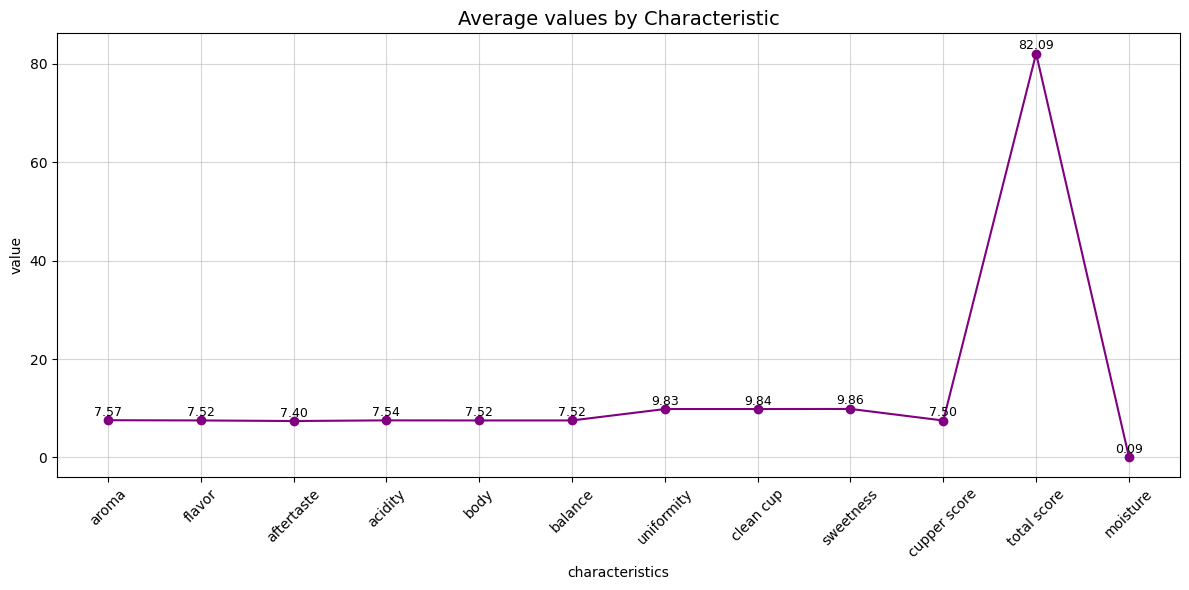

In [186]:
labels = characteristics_mean_table["Characteristics"]
values = characteristics_mean_table["Mean"]

label_renames = {
    "clean_cup": "clean cup",
    "total_cup_points": "total score",
    "cupper_points": "cupper score",
}
pretty_labels = [label_renames.get(label, label) for label in labels]

plt.figure(figsize =(12, 6))
plt.plot(pretty_labels, values, marker='o', color="purple")

for i, val in enumerate(values):
    plt.text(i, val + 0.3, f"{val:.2f}", ha='center', va='bottom', fontsize = 9)

plt.title("Average values by Characteristic", fontsize = 14)
plt.xlabel("characteristics")
plt.ylabel("value")
plt.xticks(rotation = 45)
plt.grid(True, linestyle='-', alpha = 0.5)
plt.tight_layout()
plt.show()

C:\Users\vando\AppData\Local\Temp\ipykernel_27468\2560973300.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(coffee_characteristics.values, labels=pretty_labels)


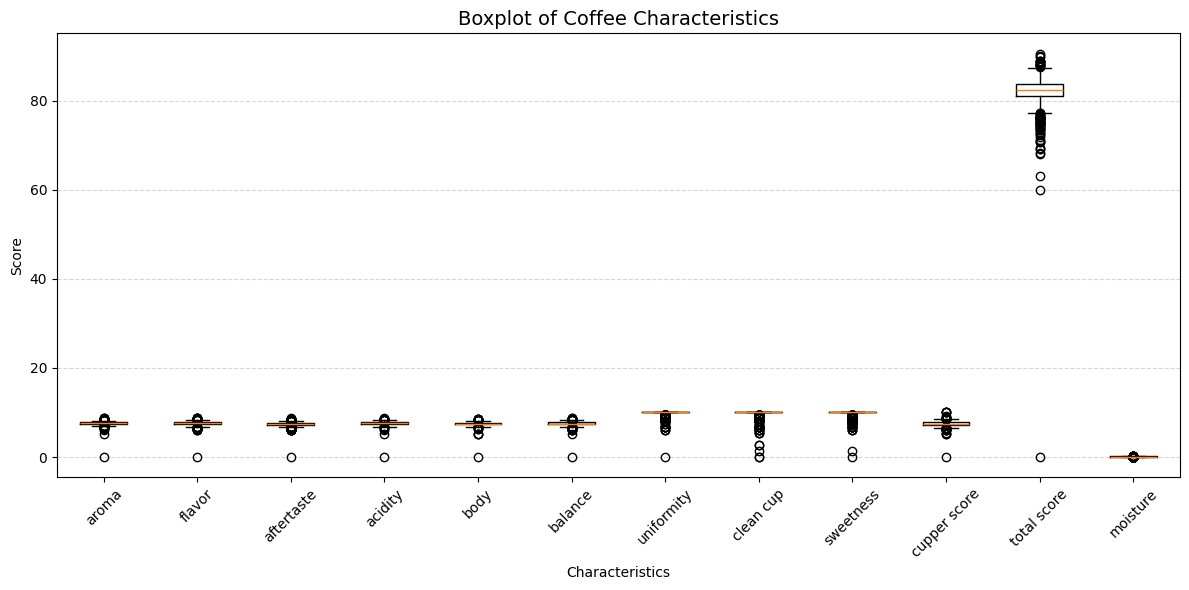

In [187]:
plt.figure(figsize=(12, 6))
plt.boxplot(coffee_characteristics.values, labels=pretty_labels)
plt.title("Boxplot of Coffee Characteristics", fontsize=14)
plt.xlabel("Characteristics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

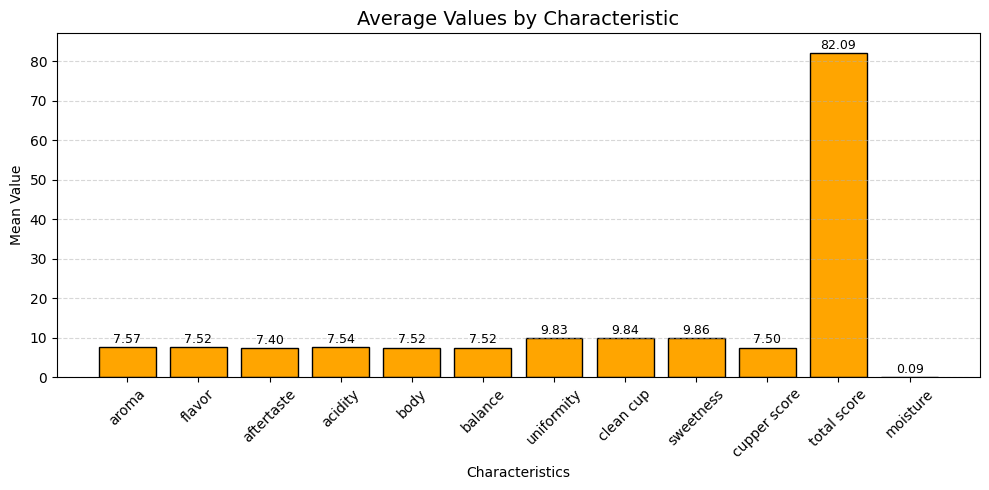

In [188]:
# labels = characteristics_mean_table["Characteristics"]
# values = characteristics_mean_table["Mean"]

# label_renames = {
#     "clean_cup": "clean cup",
#     "total_cup_points": "total score",
#     "cupper_points": "cupper score",
# }
# pretty_labels = [label_renames.get(label, label) for label in labels]

plt.figure(figsize = (10, 5))
bars = plt.bar(pretty_labels, values, color="orange", edgecolor="black")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.3, f"{height:.2f}",
            ha='center', va='bottom', fontsize = 9)

plt.title("Average Values by Characteristic", fontsize =14)
plt.xlabel("Characteristics")
plt.ylabel("Mean Value")
plt.xticks(rotation =45)
plt.ylim(0, max(values) + 5)
plt.grid(axis='y', linestyle='--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

In [189]:
merged_data_copy.columns

Index(['index', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight_kg', 'in_country_partner',
       'harvest_year', 'grading_date', 'variety', 'processing_method', 'aroma',
       'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity',
       'clean_cup', 'sweetness', 'cupper_points', 'total_cup_points',
       'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_address',
       'certification_contact', 'unit_of_measurement', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [190]:
merged_data_copy["region"].unique()

array(['guji-hambela', nan, 'oromia', 'oromiya',
       'snnp/kaffa zone,gimbowereda', 'antioquia', 'kona', 'sulawesi',
       'yirgacheffe', 'yunnan', 'gedio', 'san ramon', 'xalapa', 'sidamo',
       'south of minas', 'kapchorwa eastern', 'comayagua',
       'leye, alishan township, chiayi county', 'vale da grama',
       'west and central valley', 'muranga', 'chiang rai',
       'sul de minas - carmo de minas', 'natou county', 'nyeri',
       'eastern uganda', 'tolima', 'kiambu', 'sipi, mt elgon',
       'nuevo oriente', 'eastern', 'huila', 'boquete', 'acatenango',
       'addis ababa', 'cajamarca', 'eastern highlands province',
       'apaneca', 'ataco, apaneca - ilamatepec mountain range',
       'kirinyaga', 'bulambuli eastern region', 'huehuetenango',
       'kapchorwa', 'west valley', 'central kenya', 'oriente',
       'santander', 'lintong',
       'kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.',
       'pasto', 'aricha', 'cundinamarca', 'tarrazu'

In [191]:
merged_data_copy["company"].unique()

array(['metad agricultural developmet plc', nan,
       'yidnekachew debessa coffee plantation',
       'richmond investment-coffee department', 'diamond enterprise plc',
       'fahem coffee plantation', 'coffee quality institute',
       'yunnan coffee exchange', 'essence coffee',
       'the coffee source inc.', 'nucoffee', 'kabum trading company',
       'cigrah s.a de c.v', 'taiwan coffee laboratory',
       'exclusive coffees s.a.', 'haider abamecha coffee export',
       'c dorman ltd', 'kona pacific farmers cooperative', 'lanna cafe',
       'keremara limited', 'ucda', 'lusso coffee lab',
       'kawacom uganda ltd', 'unex guatemala, s.a.',
       'exportadora de cafe condor s.a', 'ce specialty s.a.',
       'ibrahim hussien specality coffee product & exporter', 'sertrasa',
       'unicafe', 'seid damtew coffee planation', 'sustainable harvest',
       'cqi', 'atlantic specialty coffee', 'assefa belay coffee producer',
       'kyagalanyi coffee ltd', 'exportcafe', 'great lakes 

In [192]:
merged_data_copy["altitude"].unique()

array(['1950-2200', '1600 - 1800 m', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '2000 ft',
       'meters above sea level: 2.080', '1200-1800m', '1450',
       '1700-2000m', 'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1400 m',
       '1700', '1770', 'above 1600 m', 'above 1200 m', '1550 msnm',
       '1550', '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm',
       '1900', '-1', '1580', '1100m', '1400 masl', '3500-5200 feet',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1

In [193]:
merged_data_copy[["country_of_origin", "region", "company", "altitude"]]

,country_of_origin,region,company,altitude
1,Ethiopia,guji-hambela,metad agricultural developmet plc,1950-2200
2,Ethiopia,guji-hambela,metad agricultural developmet plc,1950-2200
3,Guatemala,NaN,NaN,1600 - 1800 m
4,Ethiopia,oromia,yidnekachew debessa coffee plantation,1800-2200
5,Ethiopia,guji-hambela,metad agricultural developmet plc,1950-2200
...,...,...,...,...
1335,Ecuador,"san juan, playas",robustasa,NaN
1336,Ecuador,"san juan, playas",robustasa,40
1337,United States,"kwanza norte province, angola",global opportunity fund,795 meters
1338,India,NaN,cafe politico,NaN


### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!